In [3]:
!pip install opendatasets

  Using cached opendatasets-0.1.22-py3-none-any.whl.metadata (9.2 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)


In [4]:
import opendatasets as od

In [5]:
od.download("https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction")

Skipping, found downloaded files in "./company-bankruptcy-prediction" (use force=True to force download)


In [6]:
import os
os.listdir()

['company-bankruptcy-prediction', 'Check.ipynb', 'kaggle.json', '.venv']

In [7]:
# Step 1: Data Exploration and Preprocessing
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.9 MB/s eta 0:00:0000:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.6.1-cp39-cp39-macosx_12_0_arm64.whl (11.1 MB)
Using cached xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl (1.9 MB)
Using cached cycler-0.12.1-py3-none-any.whl (

In [8]:
#df - data frame
df = pd.read_csv("/Users/deekshapatnam/Desktop/CleaningML/company-bankruptcy-prediction/data.csv")
# Display basic information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [9]:
# Check for missing values
print(df.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


Bankrupt?
0    6599
1     220
Name: count, dtype: int64


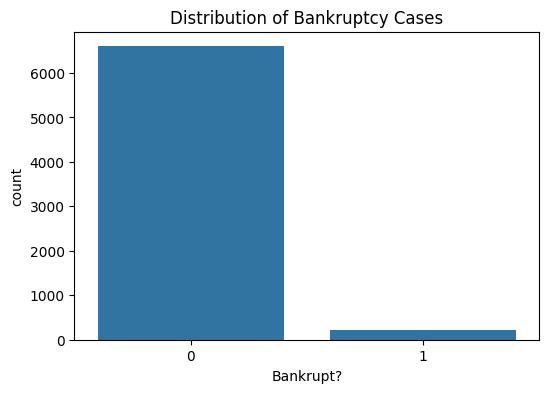

In [10]:
# Explore the distribution of the target variable
print(df['Bankrupt?'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of Bankruptcy Cases')
plt.show()

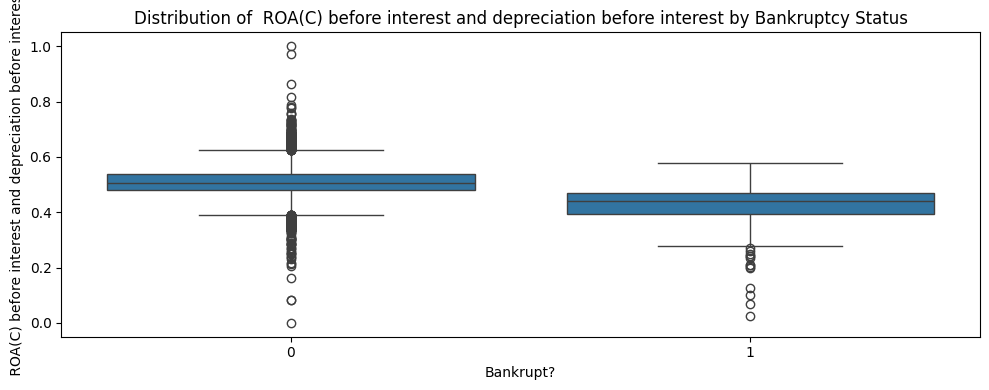

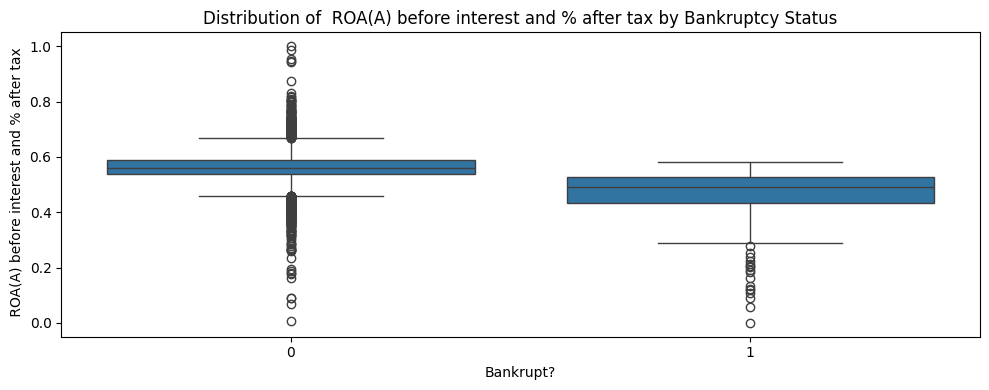

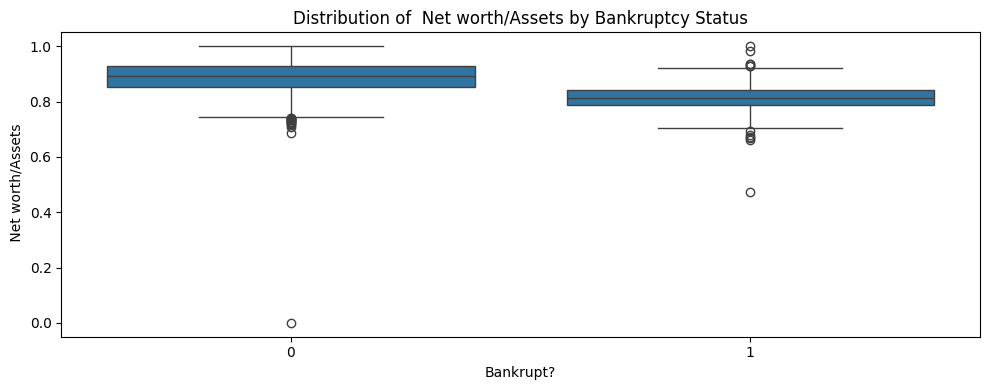

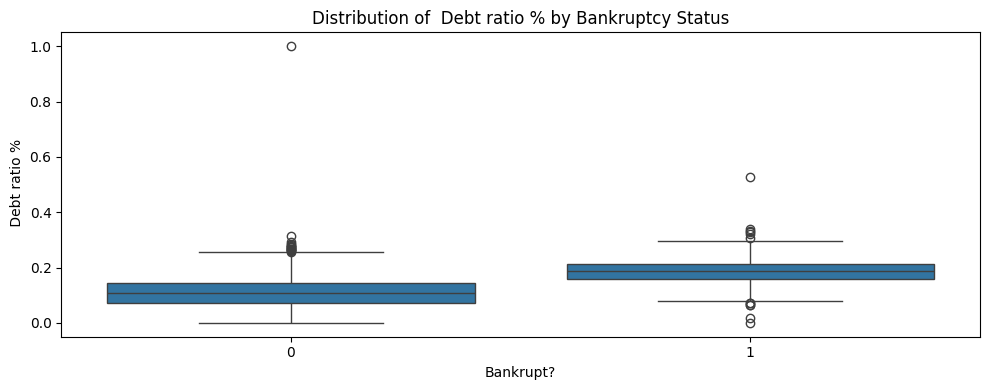

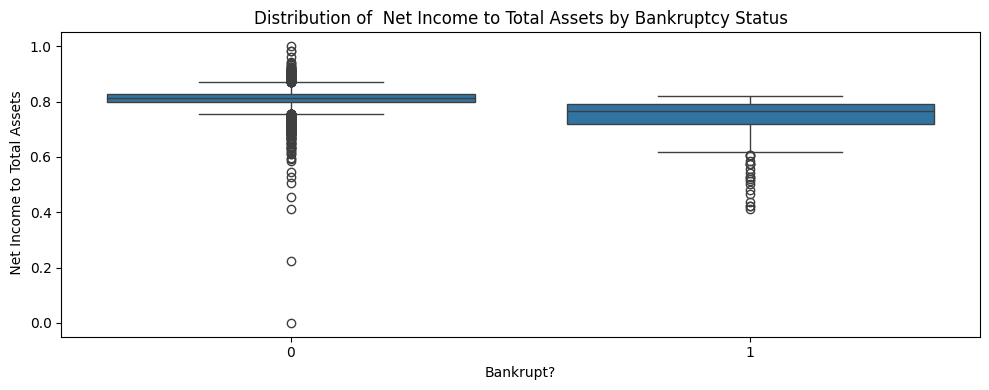

In [14]:
# Explore important features
important_features = [' ROA(C) before interest and depreciation before interest', 
                     ' ROA(A) before interest and % after tax', 
                     ' Net worth/Assets', 
                     ' Debt ratio %',
                     ' Net Income to Total Assets']

for feature in important_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Bankrupt?', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Bankruptcy Status')
    plt.tight_layout()
    plt.show()

# Prepare data for modeling
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Step 2: Model Training and Evaluation

# Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(classification_report(y_test, lr_pred))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(classification_report(y_test, rf_pred))

# XGBoost
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
                              learning_rate=0.1, 
                              n_estimators=100, 
                              max_depth=4,
                              random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print(classification_report(y_test, xgb_pred))


Logistic Regression Accuracy: 0.8783
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1320
           1       0.19      0.82      0.30        44

    accuracy                           0.88      1364
   macro avg       0.59      0.85      0.62      1364
weighted avg       0.97      0.88      0.91      1364

Random Forest Accuracy: 0.9699
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.64      0.16      0.25        44

    accuracy                           0.97      1364
   macro avg       0.80      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364

XGBoost Accuracy: 0.9465
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1320
           1       0.34      0.68      0.45        44

    accuracy                           0.95      1364
   macro avg       0.66      0.82  

In [18]:
# Use the best model (assuming XGBoost performed best)
best_model = rf_model

# Save the model and scaler
joblib.dump(best_model, 'bankruptcy_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [12]:
print(df.columns.tolist())

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth 